## Using `groupby` with `xarray` for Climate Data Analysis

In [12]:
import xarray as xr
import matplotlib.pyplot as plt

In [13]:
path='/shared/obs/gridded/OISSTv2/monthly/'
file='sst.mnmean.nc'

In [14]:
ds=xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 461)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2020-04-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V

### We can use `groupby` to organize our data in a particular way and then apply some function to it.  

For example, if we want to calculate a seasonal mean, we can use `groupby` to organize our data in time by seasons, then take a mean over that organization.

In [15]:
ds_seas=ds.groupby('time.season').mean(dim='time')
ds_seas

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, season: 4)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, lat, lon) float32 -1.7899978 -1.7899978 ... -1.7899979

As you can see, the `Dataset` has now replaced the `time` dimension with `season`.  The seasons are: DJF, JJA, MAM, SON.

## We can plot any season we want

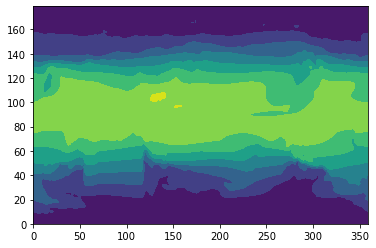

In [21]:
plt.contourf(ds_seas['sst'].sel(season='DJF'))

### Use `groupby` to calculate climatology and anomalies

First, group the data by months, then take the average for all Jans, Febs, Mars, etc. over all years to get the climatology.  

In [22]:
ds_climo=ds.groupby('time.month').mean(dim='time')
ds_climo

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, month: 12)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, lat, lon) float32 -1.7900007 -1.7900007 ... -1.7900007

Time has now been collapsed down to our 12 months.

In [23]:
ds_anoms=ds.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 461)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2020-04-01
    month    (time) int64 12 1 2 3 4 5 6 7 8 9 10 ... 6 7 8 9 10 11 12 1 2 3 4
Data variables:
    sst      (time, lat, lon) float32 7.1525574e-07 ... 7.1525574e-07